In [1]:
import torch
%matplotlib inline
import seaborn as sns

In [2]:
import sys
sys.path.append('..')

In [3]:
model_path = '../output/ablation-cifar10-models2/relog-quadratic-maxout_4.pkl'

In [4]:
model = torch.load(model_path, map_location=torch.device('cpu'))

/Users/cumeo/anaconda3/envs/newlogic/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'models.VGG' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [5]:
def extract_quadratic_weights(m):
    weights = []
    for layer in list(m.features) + list(m.classifier):
        if hasattr(layer, '_quadratic'):
            weights.append(layer._quadratic.weight)
    return torch.cat([w.flatten() for w in weights])

In [9]:
def extract_bias(m):
    bias = []
    for layer in list(m.features) + list(m.classifier):
        if hasattr(layer, 'bias'):
            bias.append(layer.bias)
    return torch.cat([b.flatten() for b in bias])

In [6]:
w = extract_quadratic_weights(model)

In [7]:
w.shape

torch.Size([37769216])

In [8]:
w.abs().mean()

tensor(0.0074, grad_fn=<MeanBackward0>)

In [26]:
w.abs().std()

tensor(0.0043, grad_fn=<StdBackward0>)

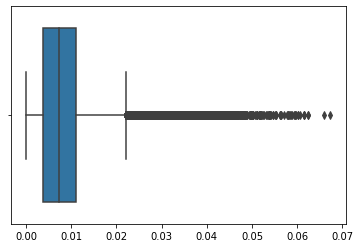

In [27]:
_ = sns.boxplot(w.abs().flatten().detach().numpy())

In [11]:
b = extract_bias(model)

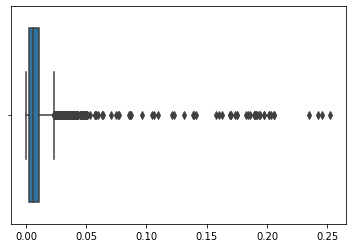

In [12]:
_ = sns.boxplot(b.abs().flatten().detach().numpy())